In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
from math import log,sqrt,exp
from scipy import stats

def bsm_value(S0,K,T,r, q, sigma, call=True):
    d1 = ( log( S0/K ) + ( r + 0.5*sigma**2 )*T )/( sigma*sqrt(T) )
    d2 = ( log( S0/K ) + ( r - 0.5*sigma**2 )*T )/( sigma*sqrt(T) )
    if call==True:
        value = S0*exp(-q*T)*stats.norm.cdf( d1,0.,1. ) - K*exp( -r*T )*stats.norm.cdf( d2,0.,1 )
        return value
    else:
        value = K*exp(-r*T)*stats.norm.cdf( -d2,0.,1 ) - S0*exp(-q*T)*norm.cdf( -d1,0.,1. )
        return value
#vega
def bsm_vega(S0, K, T, r, sigma):
    d1 = log( S0 / K ) + ( r + 0.5 * sigma ** 2 ) * T /( sigma * sqrt(T) )
    vega = S0 * stats.norm.cdf(d1, 0., 1.) * sqrt(T)
    return vega

def bsm_imp_vol_newton(S0, K, T, r, q, C0, sigma_est, call=True, it = 100):
    if call==True:
        for i in range(it):
            sigma_est -= ((bsm_value(S0,K,T,r, q, sigma_est,call=True) - C0)/ bsm_vega(S0, K, T, r, sigma_est))
        return sigma_est
    else:
        for i in range(it):
            sigma_est -= ((bsm_value(S0,K,T,r, q, sigma_est,call=False) - C0)/ bsm_vega(S0, K, T, r, sigma_est))
        return sigma_est

In [2]:
def bsm_imp_vol_newton(S0, K, T, r, q, C0, sigma_est, call=True, it = 100):
    if call==True:
        for i in range(it):
            sigma_est -= ((bsm_value(S0,K,T,r, q, sigma_est,call=True) - C0)/ bsm_vega(S0, K, T, r, sigma_est))
        return sigma_est
    else:
        for i in range(it):
            sigma_est -= ((bsm_value(S0,K,T,r, q, sigma_est,call=False) - C0)/ bsm_vega(S0, K, T, r, sigma_est))
        return sigma_est

def bsm_imp_vol_dichotomy(S0,K,T,r,C0,q,call=True):
    c_est = 0
    top = 3  
    floor = 0  
    sigma = ( floor + top )/2 
    
    if call==True:
        while abs( C0 - c_est ) > 1e-8:
            c_est = bsm_value(S0,K,T,r, q, sigma,call=True) 
            if C0 - c_est > 0: 
                floor = sigma
                sigma = ( sigma + top )/2
            else:
                top = sigma
                sigma = ( sigma + floor )/2
        return sigma 
    else:
        while abs( C0 - c_est ) > 1e-8:
            c_est = bsm_value(S0,K,T,r, q, sigma,call=False)
            if C0 - c_est > 0: 
                floor = sigma
                sigma = ( sigma + top )/2
            else:
                top = sigma
                sigma = ( sigma + floor )/2
        return sigma 


In [3]:
#import data
call_50etf_16 = pd.read_csv('D:\\call_50etf_16.csv',encoding='utf-8')
call_50etf_51 = pd.read_csv('D:\\call_50etf_51.csv',encoding='utf-8')
call_50etf_79 = pd.read_csv('D:\\call_50etf_79.csv',encoding='utf-8')

#read the price
price_16 = call_50etf_16['最新价']
k_16 = call_50etf_16['行权价']
price_51 = call_50etf_51['最新价']
k_51 = call_50etf_51['行权价']
price_79 = call_50etf_79['最新价']
k_79 = call_50etf_79['行权价']

#yearize the time
t_16 = 16/365
t_51 = 51/365
t_79 = 79/365

#initial price
s0 = 2.533
#use shibor to replace the no risk interest rate
rf = 0.025

In [4]:
q=0
sigma_init=1
sigma_16_newton=[]
sigma_16_dichotomy=[]
for i in range(call_50etf_16.shape[0]):
    sigma_16_newton.append(bsm_imp_vol_newton(s0,k_16[i],t_16,rf,q,price_16[i],sigma_init,call=True))
    sigma_16_dichotomy.append(bsm_imp_vol_dichotomy(s0,k_16[i],t_16,rf,price_16[i],q,call=True))
    
print('imp_vol_newton_16:')
print(sigma_16_newton)
print('imp_vol_dichotomy_16:')
print(sigma_16_dichotomy)
print('-------------------------------------------------------------------------------------------------------------------------------------')
#
sigma_51_newton=[]
sigma_51_dichotomy=[]
for i in range(call_50etf_51.shape[0]):
    sigma_51_newton.append(bsm_imp_vol_newton(s0,k_51[i],t_51,rf,q,price_51[i],sigma_init,call=True))
    sigma_51_dichotomy.append(bsm_imp_vol_dichotomy(s0,k_51[i],t_51,rf,price_51[i],q,call=True))

print('imp_vol_newton_51:')    
print(sigma_51_newton)
print('imp_vol_dichotomy_51:')
print(sigma_51_dichotomy)
print('-------------------------------------------------------------------------------------------------------------------------------------')

#
sigma_79_newton=[]
sigma_79_dichotomy=[]
for i in range(call_50etf_79.shape[0]):
    sigma_79_newton.append(bsm_imp_vol_newton(s0,k_79[i],t_79,rf,q,price_79[i],sigma_init,call=True))
    sigma_79_dichotomy.append(bsm_imp_vol_dichotomy(s0,k_79[i],t_79,rf,price_79[i],q,call=True))

print('imp_vol_newton_79:')     
print(sigma_79_newton)
print('imp_vol_dichotomy_79:')
print(sigma_79_dichotomy)
print('-------------------------------------------------------------------------------------------------------------------------------------')


imp_vol_newton_16:
[0.3638689603157307, 0.3647065048442553, 0.33796965226626546, 0.3087508280418194, 0.29010352112059345, 0.27704783086782625, 0.2678504434116786, 0.27958298121452063, 0.2815159982582914, 0.2892477867510613, 0.2948778490238011, 0.3001603015476018, 0.3079952199130588]
imp_vol_dichotomy_16:
[0.3638690114021301, 0.3647065758705139, 0.33796969056129456, 0.3087505102157593, 0.290103480219841, 0.2770475149154663, 0.2678511142730713, 0.2795829623937607, 0.28151603043079376, 0.2892477214336395, 0.29487812519073486, 0.3001604676246643, 0.30799537897109985]
-------------------------------------------------------------------------------------------------------------------------------------
imp_vol_newton_51:
[0.2663830055838, 0.2623349770104388, 0.25886692974504383, 0.25514765329363565, 0.25388257585478174, 0.25112748137747243, 0.25311127192458244, 0.25282431711916714, 0.25334527303228827]
imp_vol_dichotomy_51:
[0.26638298481702805, 0.26233501732349396, 0.25886694341897964, 0.2551

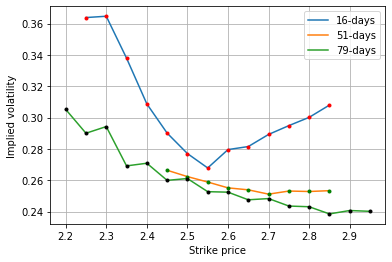

In [5]:
#newton 
plt.plot(k_16,sigma_16_newton,label='16-days',lw=1.5,)
plt.plot(k_16,sigma_16_newton,'r.')
plt.plot(k_51,sigma_51_newton,label='51-days',lw=1.5)
plt.plot(k_51,sigma_51_newton,'g.')
plt.plot(k_79,sigma_79_newton,label='79-days',lw=1.5)
plt.plot(k_79,sigma_79_newton,'k.')

plt.grid(True)
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.legend()
plt.show()

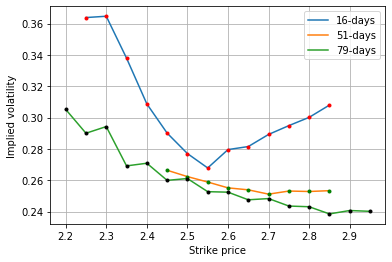

In [6]:
#dichotomy 
plt.plot(k_16,sigma_16_dichotomy,label='16-days',lw=1.5,)
plt.plot(k_16,sigma_16_dichotomy,'r.')
plt.plot(k_51,sigma_51_dichotomy,label='51-days',lw=1.5)
plt.plot(k_51,sigma_51_dichotomy,'g.')
plt.plot(k_79,sigma_79_dichotomy,label='79-days',lw=1.5)
plt.plot(k_79,sigma_79_dichotomy,'k.')

plt.grid(True)
plt.xlabel('Strike price')
plt.ylabel('Implied volatility')
plt.legend()
plt.show()